In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

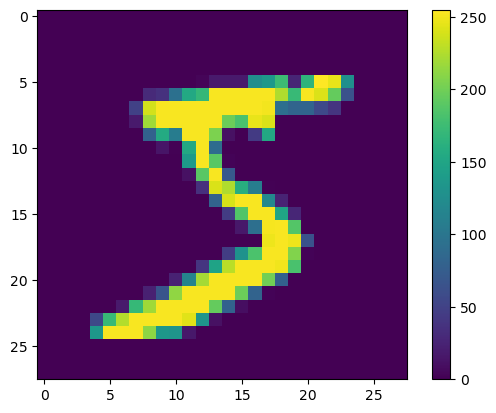

In [6]:
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
print(train_labels[0])

5


In [8]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [9]:
train_images = train_images / 255
test_images = test_images / 255

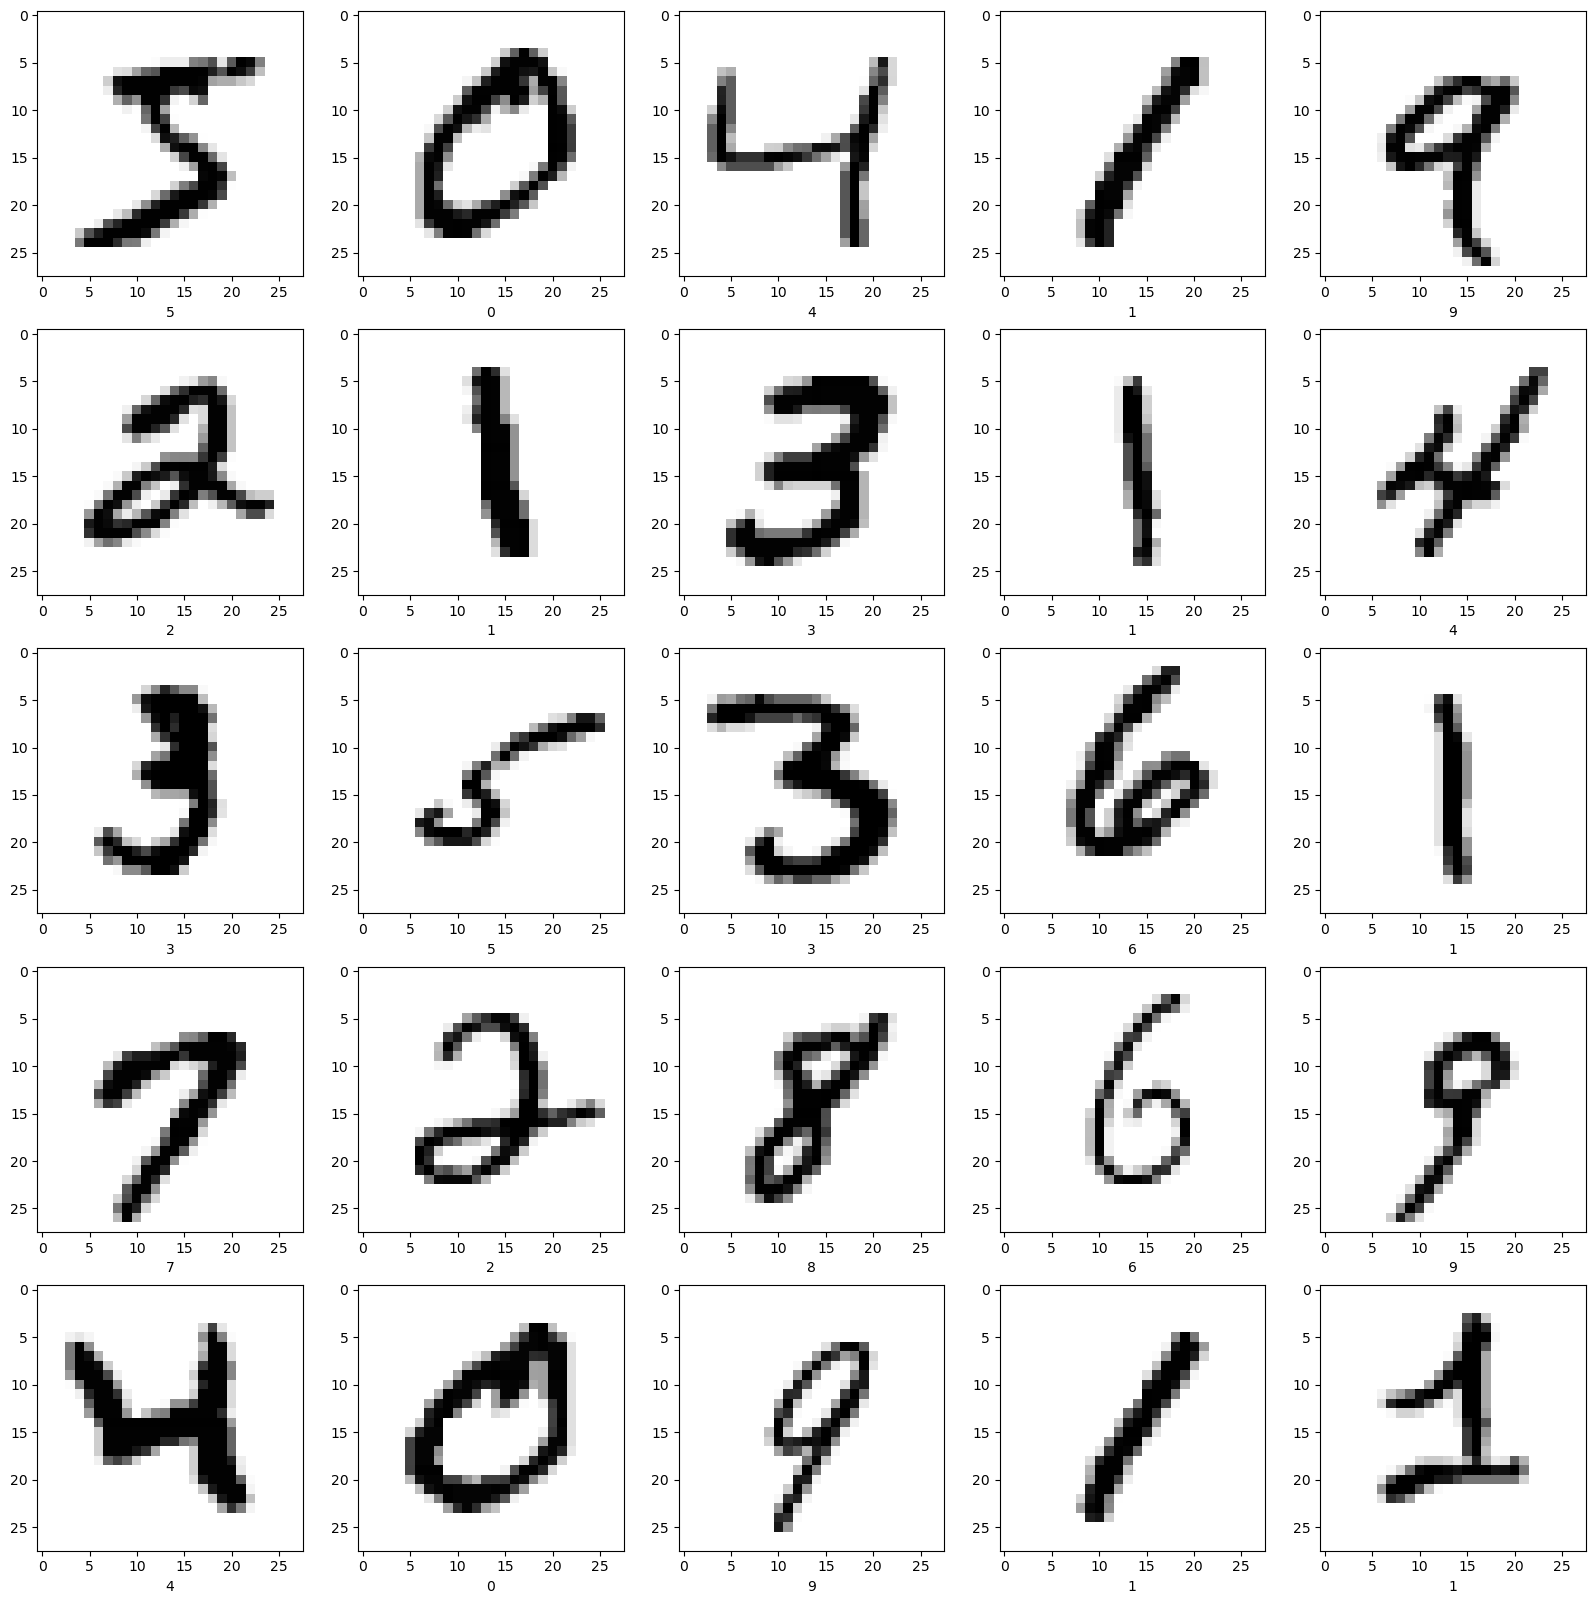

In [10]:
plt.figure(figsize = (20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(train_labels[i])

plt.show()

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(130, activation = 'relu'))
model.add(tf.keras.layers.Dense(10), activation = 'softmax')


In [12]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy (from_logits=True), optimizer = 'adam', metrics = ['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2608 - accuracy: 0.9253
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1129 - accuracy: 0.9663
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0761 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0570 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0433 - accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0345 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0274 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0220 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0194 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [14]:
model_loss, model_accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print(f"Model Loss: {model_loss}, Model Accuracy: {model_accuracy}")

313/313 - 1s - loss: 0.0865 - accuracy: 0.9772 - 954ms/epoch - 3ms/step
Model Loss: 0.08646348863840103, Model Accuracy: 0.9771999716758728


In [15]:
prediction_model = tf.keras.models.Sequential([model, tf.keras.layers.Softmax()])
predictions = prediction_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [16]:
predictions[5]

array([7.7099599e-10, 9.9937975e-01, 1.4275676e-07, 2.2536157e-07,
       1.9064983e-05, 5.1814844e-11, 1.2620058e-10, 5.9815822e-04,
       2.5032011e-06, 1.4140340e-07], dtype=float32)

In [17]:
np.argmax(predictions[5])

1

In [18]:
test_labels[5]

1

In [34]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(train_labels[predicted_label],
                                100*np.max(predictions_array),
                                train_labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

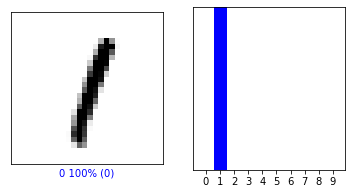

In [36]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

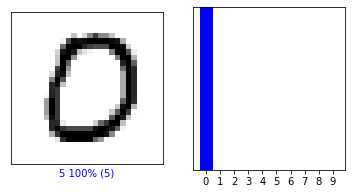

In [38]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

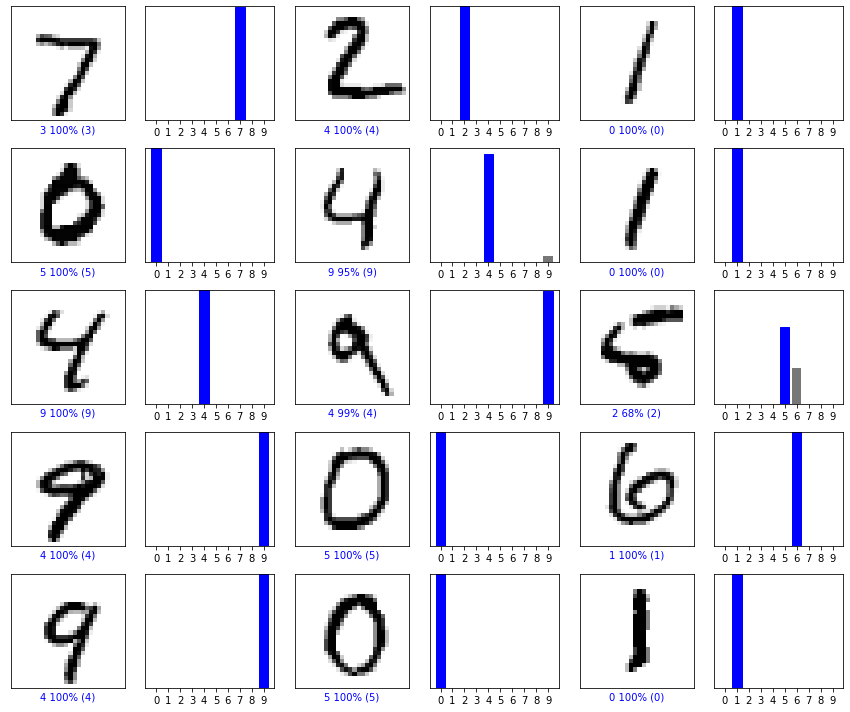

In [39]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()